In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [8]:
# Load training and validation datasets
train = pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/DataMining-Fall/refs/heads/master/insurance_t.csv")
validation = pd.read_csv("https://raw.githubusercontent.com/sjsimmo2/DataMining-Fall/refs/heads/master/insurance_v.csv")

In [11]:
# Replace missing values with the string "missing"
train.fillna("missing", inplace=True)
validation.fillna("missing", inplace=True)

# for missing

C:\Users\liulu\AppData\Local\Temp\ipykernel_24832\617073175.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.fillna("missing", inplace=True)
C:\Users\liulu\AppData\Local\Temp\ipykernel_24832\617073175.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  validation.fillna("missing", inplace=True)


In [13]:
# Replace 'purchase_annuity' with the actual target variable name in your dataset
X_train = train.drop(columns=['INS'])  # Features
y_train = train['INS']  # Target variable
X_val = validation.drop(columns=['INS'])  # Validation features
y_val = validation['INS']  # Validation target


In [15]:
# one hot encoding for categorical vars
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)

# Align the training and validation sets
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)


In [45]:
# Initialize and fit the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=6, random_state=42) #try 6 layers
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [47]:
# Make predictions
y_pred = tree_model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_val, y_pred))

Accuracy: 0.7227
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1382
           1       0.63      0.51      0.56       742

    accuracy                           0.72      2124
   macro avg       0.69      0.67      0.68      2124
weighted avg       0.71      0.72      0.72      2124



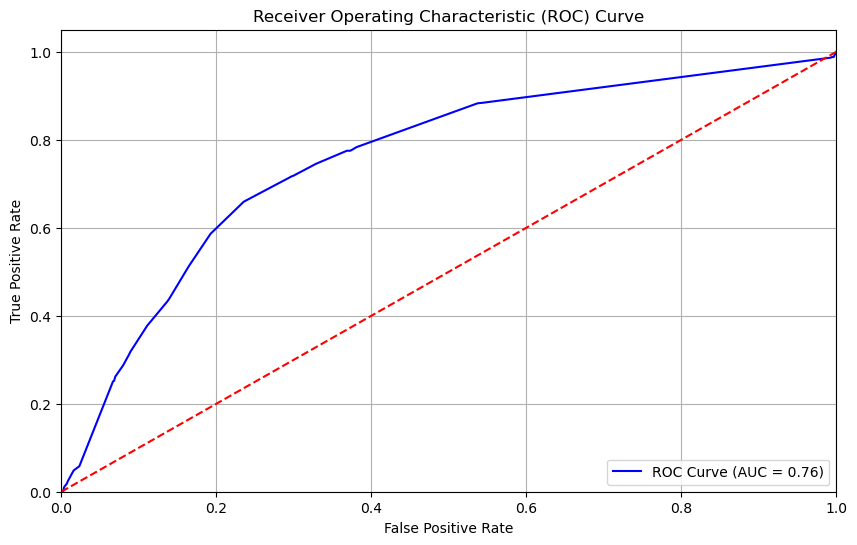

In [53]:
# visualize through ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = tree_model.predict_proba(X_val)[:, 1]  # Assuming the positive class is at index 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [49]:
# Convert class names to strings
class_names = np.unique(y_train).astype(str)
class_names

array(['0', '1'], dtype='<U21')

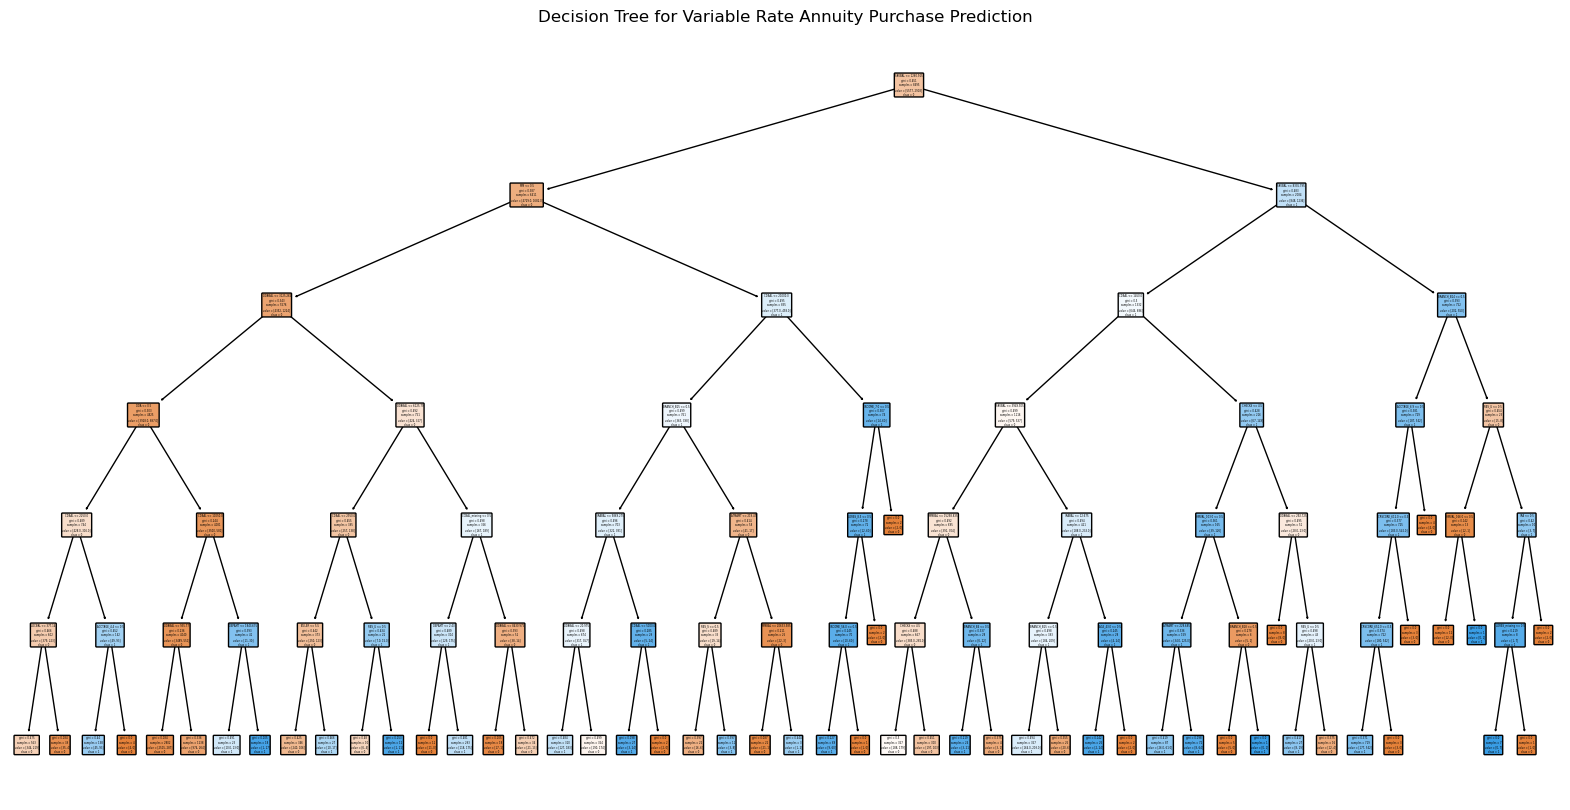

In [51]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=class_names, rounded=True)
plt.title('Decision Tree for Variable Rate Annuity Purchase Prediction')
plt.show()

### Comparison with previous Logistic Regression model